In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.signal import get_window
import numpy as np

# Load songs from different genres
def load_song(path):
    signal, sr = librosa.load(path, sr=22050)  # Standardize to 22050 Hz
    return signal, sr

# Apply windowing technique
#def apply_window(signal, window_type='hann', window_size=2048):
#    window = get_window(window_type, window_size)
#    print(window)
#    return signal * window
#import numpy as np
#from scipy.signal import get_window

def apply_window(signal, window_type='hann', window_size=2048):
    window = get_window(window_type, window_size)

    # Ensure window size matches the signal shape
    num_windows = len(signal) // window_size  # Compute how many full windows fit in the signal
    trimmed_signal = signal[:num_windows * window_size]  # Trim signal to match

    windowed_signal = trimmed_signal.reshape(num_windows, window_size) * window  # Apply window
    return windowed_signal

# Plot spectrogram
def plot_spectrogram(signal, sr, window_type, title="Spectrogram"):
    stft_result = librosa.stft(signal, n_fft=2048)
    magnitude, _ = librosa.magphase(stft_result)
    magnitude = np.mean(magnitude, axis=-1)  # Reduce the last dimension if necessary

    print(magnitude.shape)  # Should be (n_freq_bins, n_time_frames)

    plt.figure(figsize=(10, 6))
    librosa.display.specshow(librosa.amplitude_to_db(magnitude, ref=np.max), y_axis='log', x_axis='time', sr=sr)
    plt.title(f"{title} ({window_type} Window)")
    plt.colorbar(format="%+2.0f dB")
    plt.show()


(2097, 1025)


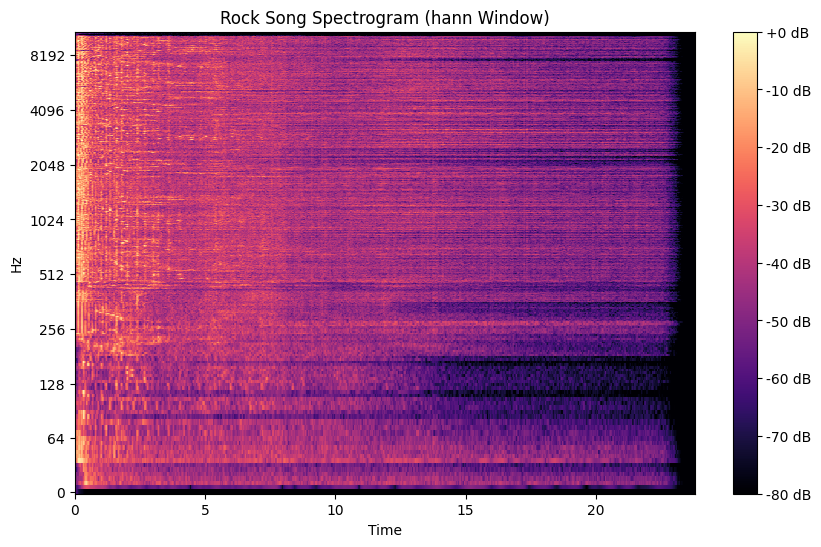

(2201, 1025)


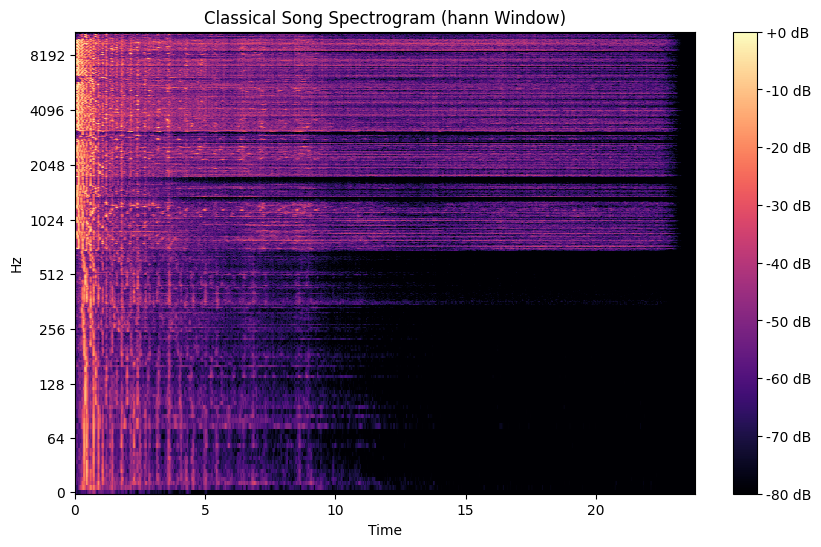

(696, 1025)


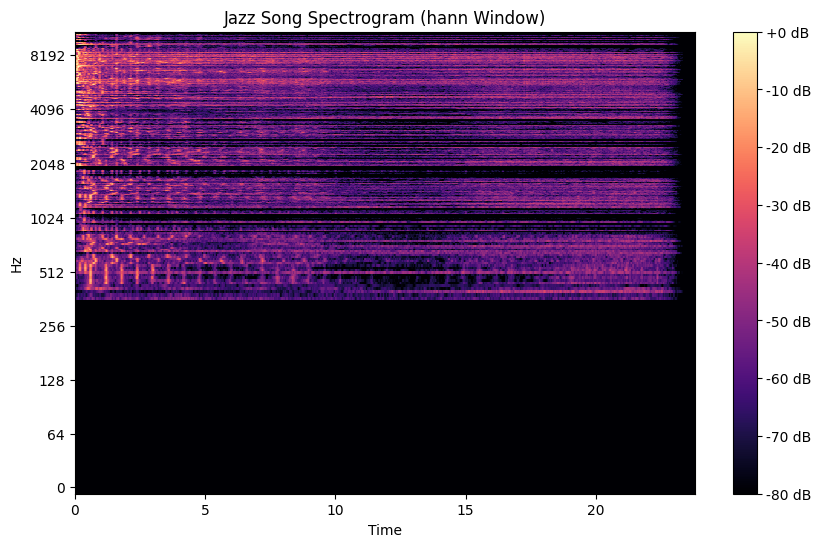

(1499, 1025)


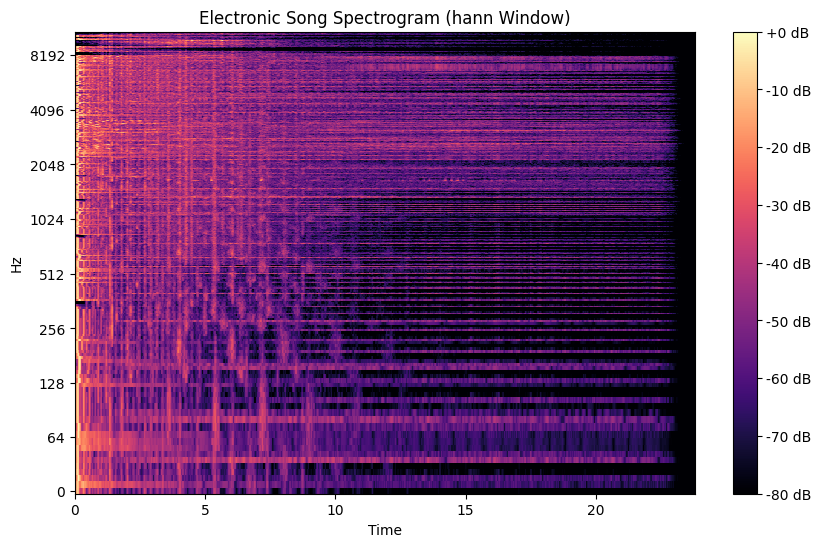

In [2]:
# Example usage for comparing songs
if __name__ == "__main__":
    # Load example songs from different genres
    #rock_song = "/kaggle/input/selectedsongs/powerful-energy-upbeat-rock-advertising-music-245728.wav"    # Replace with actual path
    #classical_song = "/kaggle/input/selectedsongs/classical-moder-piano-music-276051.wav"    # Replace with actual path
    #jazz_song = "/kaggle/input/selectedsongs/pop-instrumental-262959.wav"    # Replace with actual path
    #electronic_song = "/kaggle/input/selectedsongs/on-hip-hop-190546.wav"    # Replace with actual path

    rock_song = "/kaggle/input/newsongs/rock-i-have-a-rock-soul-2-292427.wav"    # Replace with actual path
    classical_song = "/kaggle/input/newsongs/simasx27s-songs-classical-240465.wav"    # Replace with actual path
    jazz_song = "/kaggle/input/newsongs/havana-beach-club_pop-259865.wav"    # Replace with actual path
    electronic_song = "/kaggle/input/newsongs/hip-pop-vol-6-253105.wav"    # Replace with actual path

    
    # Load each song
    rock_signal, sr_rock = load_song(rock_song)
    classical_signal, sr_classical = load_song(classical_song)
    jazz_signal, sr_jazz = load_song(jazz_song)
    electronic_signal, sr_electronic = load_song(electronic_song)

    #print(rock_signal)
    #print(sr_rock)
    # Apply windowing and plot spectrograms
    for signal, sr, genre in zip([rock_signal, classical_signal, jazz_signal, electronic_signal],
                                 [sr_rock, sr_classical, sr_jazz, sr_electronic],
                                 ["Rock", "Classical", "Jazz", "Electronic"]):
        #print(signal)
        windowed_signal = apply_window(signal, window_type='hann')
        #print(windowed_signal)
        plot_spectrogram(windowed_signal, sr, window_type='hann', title=f"{genre} Song Spectrogram")
